## Project-1: TMDB_5000_Movies Data Analysis, Exploration, and Visualization
> The Main Goal of this project is to extact useful insights from the data and go through the data preparation (Pre-Processing) prcess more deep.
> Here we would like to show up some important and useful information about the movies perfomed over years [1960-2015] and highlight the most important attributes of any movie.

>**QUESTIONS**
><ul>
><li>What is the absolute profit value for each movie?</li>
><li>What is Revnue VS Budget Progress Over Years?</li>
><li>Which Year Has Highest Revnue?</li>
><li>Which genres are most popular from year to year?</li>
</ul>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [305]:
# Raeding The Dataset from its Path, and show up some content
DATA_PATH = r"D:\Work\FWD- Advanced Data Analysis NanoDegree\PROJECT - ONE\tmdb-movies.csv"
DF = pd.read_csv(DATA_PATH)
DF.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [286]:
DF.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


### 1.  Data Wrangling

In [306]:
## [EXPLORE] How Many Features\Observations Do We have?
print("[INFO] Dataset contains {} ROWS, and {} COLUMNS".format(DF.shape[0], DF.shape[1]))

[INFO] Dataset contains 10866 ROWS, and 21 COLUMNS


In [307]:
## [EXPLORE] Do We Have Any Null Values?
BOOL = DF.isnull().values.any()
if BOOL:
    print("[INFO] The Dataset Contains Nan Values")
else:
    print("[INFO] The Dataset Doesn't Contain any Nan Values")

[INFO] The Dataset Contains Nan Values


In [308]:
## [EXPLORE] IF YES, How Many Null Values in Each Feature Do We Have?
print("[INFO] Q.1 How Many NaN values per column?\n")
print(DF.isna().sum())

[INFO] Q.1 How Many NaN values per column?

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [309]:
## [EXPLORE] What is Our Features' Data Types?
print("[INFO] TMDB Dataset ::\n")
print(DF.info())

[INFO] TMDB Dataset ::

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 


In [310]:
## [EXPLORE] What is the (count, min, max, standard division, quartilles) of each feature? More INFO about the dataset
DEC = DF.describe()
print("[INFO] The Numerical Columns' Statistics::\n")
DEC

[INFO] The Numerical Columns' Statistics::



,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 2.  Data Cleansing
> WHAT IS THE MAIN POINTS SHOULD WE Consider While Cleansing The Data?
<ul>
<li>Drop Duplicate Rows (Not Useful)</li>
<li>Fill NaN Values (With Most Frequent Values)</li>
<li>Change Data Types as Needed</li>
<li> Select IMPORTANT Columns Only</li>
</ul>

In [311]:
## [PREPARATION] Drop Duplicate ROWS and Explore it's Size!
DF_Size_Bf = DF.size
print("[INFO] Data Size Before Dropping Duplicate Rows IS :: {}".format(DF_Size_Bf))
DF = DF.drop_duplicates().reindex()
DF_Size_Af = DF.size
print("[INFO] Data Size After Dropping Duplicate Rows IS :: {}".format(DF_Size_Af))
print("[INFO] The Number of Dropped ROWS is :: {}".format(DF_Size_Bf-DF_Size_Af))

[INFO] Data Size Before Dropping Duplicate Rows IS :: 228186
[INFO] Data Size After Dropping Duplicate Rows IS :: 228165
[INFO] The Number of Dropped ROWS is :: 21


In [312]:
## [PREPARATION] Fill The Categorical Null Values with The Most frequent values (Mode)
DF.fillna(DF.select_dtypes(include='object').mode().iloc[0], inplace=True)
DF.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,http://phantasm.com,Eldar Ryazanov,Based on a true story.,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,http://phantasm.com,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,http://phantasm.com,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [313]:
## [PREPARATION] Convert the Categorical features to Str Dtype, and the integer format of the Date Column to DateTime
DF['cast'] = DF['cast'].astype(str)
DF['genres'] = DF['genres'].astype(str)
DF['release_date'] = pd.to_datetime(DF['release_date'].astype(str), infer_datetime_format=True)
print("[INFO] TMDB Dataset ::\n")
print(DF.info())

[INFO] TMDB Dataset ::

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10865 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10865 non-null  object        
 7   homepage              10865 non-null  object        
 8   director              10865 non-null  object        
 9   tagline               10865 non-null  object        
 10  keywords              10865 non-null  object        
 11  overview              10865 non-null  object        
 12  runtime               10865 non-null  int64       

In [314]:
## [PREPARATION] SELCET MOST EFFECTIVE COLUMNS ONLY
print("[INFO] Basic Columns of The Data Are::\n{}\n".format(DF.columns.tolist()))
DF = DF[['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast','runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year',]]
print("[INFO] NEW Columns of The Data Are::\n{}".format(DF.columns.tolist()))

[INFO] Basic Columns of The Data Are::
['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']

[INFO] NEW Columns of The Data Are::
['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year']


In [315]:
## [PREPARATION] convert string format of category separated values into a LIST of categories
DF['cast'] = DF['cast'].str.split("|")
DF['genres'] = DF['genres'].str.split("|")

## Questions ::
<ul>
<li>What is the absolute profit value for each movie?</li>
<li>What is Revnue VS Budget Progress Over Years?</li>
<li>Which Year Has Highest Revnue?</li>
<li>Which genres are most popular from year to year?</li>
<li>What kinds of properties are associated with movies that have high revenues?
</li>
</ul>

In [439]:
## [PREPARATION] Generating (PROFIT) Column to calculate the diffrence between the paied budget and the return revenue per movie
DF['Profit'] = DF['revenue'] - DF['budget']
DF['Profit'].head()

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: Profit, dtype: int64

In [440]:
## [PREPARATION] GENERATE a list of Distinct Genres
from itertools import chain
GENRES_ = sorted(list(set(list(chain(*DF['genres'].values.tolist())))))
print("[INFO] ALL Genres Are Devided to {} Kinds :: \n{}".format(len(GENRES_), GENRES_))

[INFO] ALL Genres Are Devided to 20 Kinds :: 
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


### 3. Data Visualization
> [EXPLORATION] Plot Correlation of the Data to know dependent and independent features

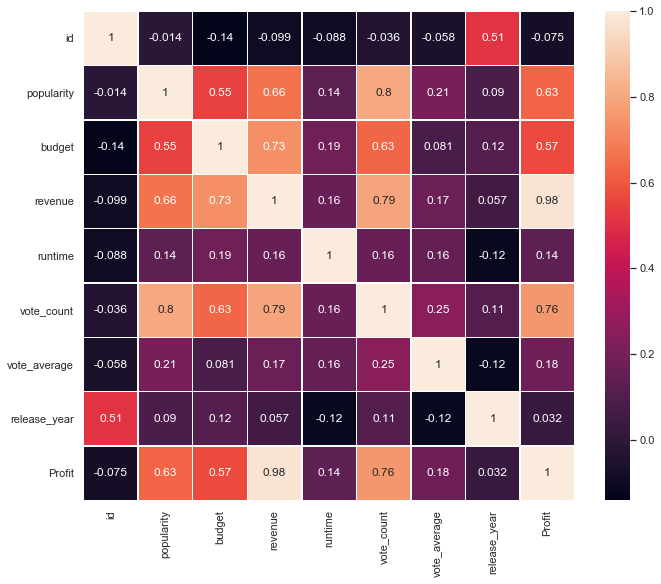

In [486]:
CORRELATION = DF.corr()   ## Get Correlation Matrix of the Dataframe
## Plot the Heatmap of the matrix
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(CORRELATION, annot=True, linewidths=.5)

> **Q**: How the promotion of releasing new movies is changing over years?

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


Text(0.5, 1.0, 'Year Vs Number Of Movies')

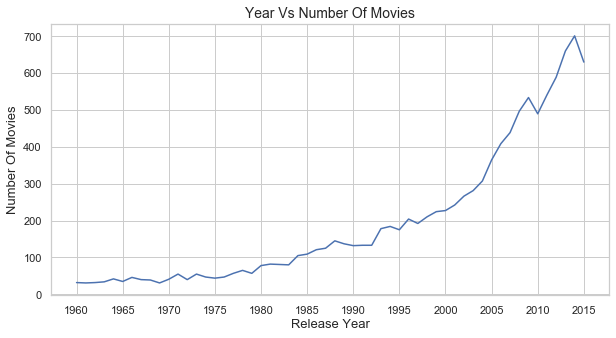

In [465]:
## [Insights] Plot Release_year Vs id count 
Data=DF.groupby('release_year').count()['id']
print(Data.tail())
DF.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(10,5)})
plt.xlabel('Release Year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
plt.title("Year Vs Number Of Movies",fontsize = 14)


In [476]:
## [CODE] Function to create Similar Plots in Diffrent prespectives
def CREATE_BAR(X, Y, Xlabel, Ylabel, title, Figsize, Total=None, Xticks=False):
    fig, ax = plt.subplots(figsize=Figsize)
    plt.bar(X, Y)
    plt.xlabel(Xlabel)
    plt.ylabel(Ylabel)
    if Total:
        for i in range(len(X)):
            plt.annotate(str(Y[i])+ " ({}%)".format(round((Y[i]/Total)*100, 1)), xy=(X[i],Y[i]), ha='center', va='bottom')
    if Xticks:
        plt.xticks(np.arange(1960,2016,5))
    plt.title(title)
    plt.show()

> **Q**: How many Movies does have positive\ negative\ and zero profit?

[INFO] 34.7% of The Movies has POSITIVE impact over years [1960-2015]
[INFO] 43.3% of The Movies has NORMAL impact over years [1960-2015]
[INFO] 22.0% of The Movies has NEGATIVE impact over years [1960-2015]



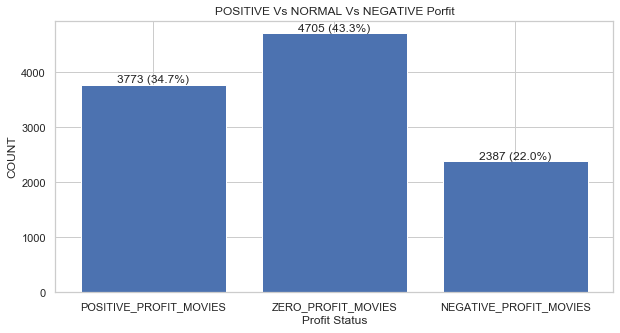

In [515]:
## Segmentation of Profit
POSITIVE_PROFITS = len(DF.loc[DF['Profit']>0])
NEGATIVE_PROFITS = len(DF.loc[DF['Profit']<0])
ZEROS_PROFITS = len(DF.loc[DF['Profit']==0])

X = ['POSITIVE_PROFIT_MOVIES', 'ZERO_PROFIT_MOVIES', 'NEGATIVE_PROFIT_MOVIES']
Y = [POSITIVE_PROFITS, ZEROS_PROFITS, NEGATIVE_PROFITS]
## Calculating The Percentage for each aspect
POS_PERCENT = round((POSITIVE_PROFITS/len(DF['Profit']))*100, 1)
ZER_PERCENT = round((ZEROS_PROFITS/len(DF['Profit']))*100, 1)
NEG_PERCENT = round((NEGATIVE_PROFITS/len(DF['Profit']))*100, 1)
print("[INFO] {}% of The Movies has POSITIVE impact over years [1960-2015]".format(POS_PERCENT))
print("[INFO] {}% of The Movies has NORMAL impact over years [1960-2015]".format(ZER_PERCENT))
print("[INFO] {}% of The Movies has NEGATIVE impact over years [1960-2015]\n".format(NEG_PERCENT))

## Plotting these percentages
CREATE_BAR(X, Y, "Profit Status", "COUNT", "POSITIVE Vs NORMAL Vs NEGATIVE Porfit", (10,5), len(DF['Profit']))

> **Q**: Which Year Have The Heighest Movie Revenue?

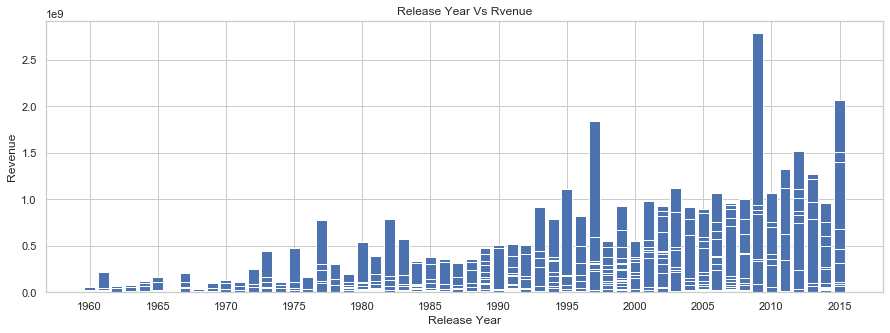

In [478]:
## Bar Plot of the Release_year, and Revenue
CREATE_BAR(DF['release_year'], DF['revenue'], "Release Year", "Revenue", "Release Year Vs Rvenue", (15,5), None, True)

> **INSIGHT**: Bundget Vs. return revenue 

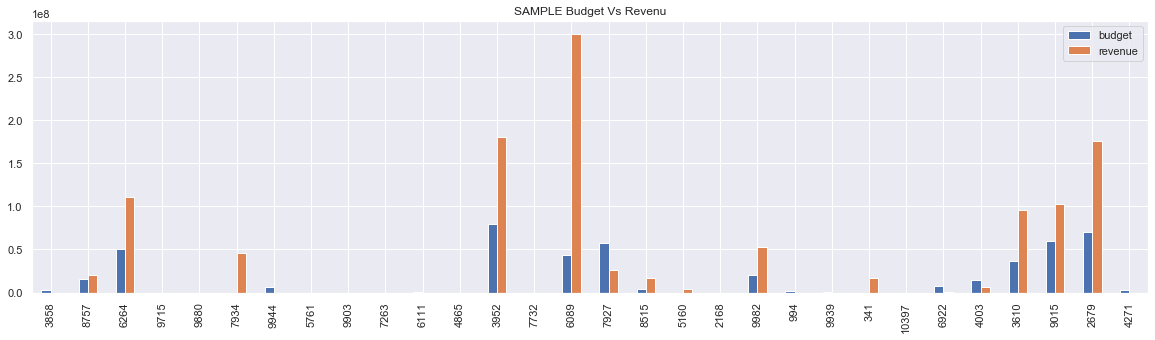

In [469]:
XPLOT = DF[['budget', 'revenue']].sample(30).plot(kind='bar',figsize=(20,5), title="SAMPLE Budget Vs Revenu")

> Q. Which favouraite Genre over Years?

In [470]:
from columnar import columnar
COLUMNS = ['GENRES', 'COUNT']
DA = pd.DataFrame(columns = COLUMNS)
for GENRE in GENRES_:
    COUNT = 0
    for ROW in DF['genres'].values:
        if GENRE in ROW:
            COUNT+=1
    DA = DA.append({'GENRES': GENRE, 'COUNT': COUNT}, ignore_index=True)
DA

,GENRES,COUNT
0,Action,2384
1,Adventure,1471
2,Animation,699
3,Comedy,3816
4,Crime,1354
5,Documentary,520
6,Drama,4760
7,Family,1231
8,Fantasy,916
9,Foreign,188


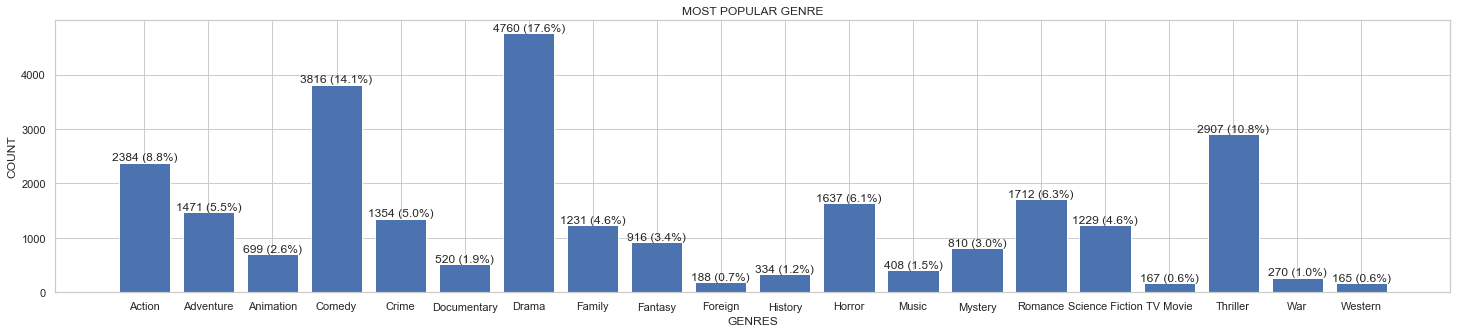

In [479]:
## PLOT GENRES Vs. How Much it's Common
CREATE_BAR(DA['GENRES'], DA['COUNT'], "GENRES", "COUNT", "MOST POPULAR GENRE", (25,5), GENRES_SUM)

### Q. What is the average rating for most of the movies?

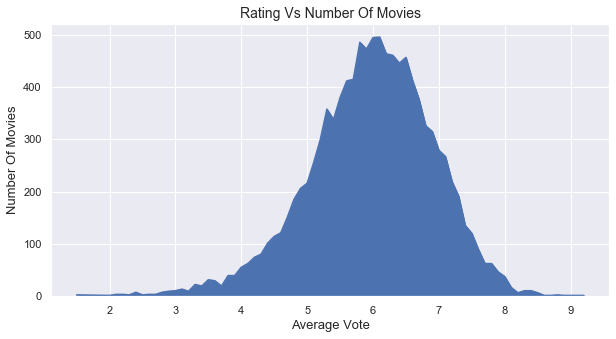

In [472]:
DF.groupby('vote_average').count()['id'].plot(kind='area')
sns.set(rc={'figure.figsize':(25,5)})
plt.xlabel('Average Vote',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
plt.title("Rating Vs Number Of Movies",fontsize = 14)
plt.show()

> **Q**: How the Vote_average is affacting the movie profit and vise versa?

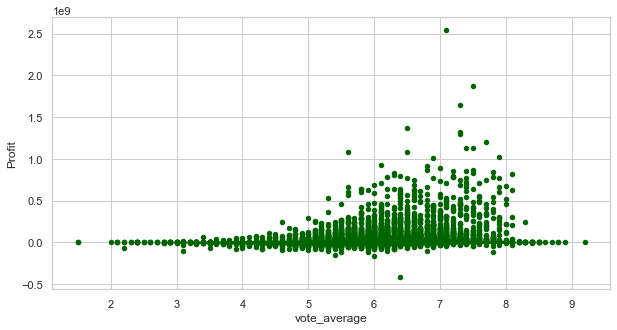

In [497]:
## Plot the vote_average Vs. Movie Profit
ax2 = DF.plot.scatter(x='vote_average', y='Profit', c='DarkGreen', colormap='viridis')

> [EXPLORATION] Distribution of Popularity

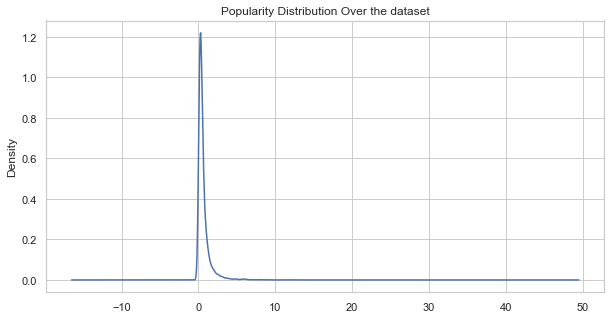

In [507]:
DF['popularity'].plot.kde(title='Popularity Distribution Over the dataset')

## 4.CONCLUSION
> **Plot-1**: It's the Heatmap that represents the Correlation of the Features with each other, for example:
Profit is correlated with vote_count, budget, revenue, popularity features.
And Budget is correlated with revenue, and popularity
>
> **Plot-2**: This plot shows that the number of movies is genuinly increasing from [2010-2015].
> 
> **Plot-3**: This plot shows that most of the movies doesn't have any profit that can be represented as 43.3% of the total number of moves, and 34.7% have positive profit return than 22.0% of them have negative return that the budget of the movie is larger than the revenue

> **Reflections**::

<ul>
    <li>is the data provided by the dataset sufficient to answer your question?</li> 
    
> YES
    
    <li>is the size of the dataset is sufficient to give a good judgement about the questions you asked?</li>
> YES
    
    <li>What are the major difficulties you encountered in the dataset while performing the analysis?</li>
> No Difficulties
    
    <li>Is dropping lines from the dataset was an issue affecting accuracy of the analysis?</li>
> No, But the Nan\0 Values casued sort of bad numbers while counting the positive and negative profite
 
    <li>Is it sufficient to decide on existing correlations between variables just by looking at scatter plots, or a statistical hypothesis testing is needed?</li>
> No, statistical hypothesis is needed
</ul>